<a href="https://colab.research.google.com/github/WaleedAhmed565/Ai-lab1/blob/main/RNNSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/PM Imran Khan 67 speeches.txt'

# Open and read the file
with open(file_path, 'r') as file:
    file_contents = file.read()

print(file_contents)


Date,Title,Content
2021-12-19 00:00:00,PM Imran Khan Address OIC Summit 2021   19 12 2021,"

[general] respected foreign ministers ladies and gentlemen  
[general] first of all let me welcome all of you to pakistan  
[development] the irony is that 41 years ago the extraordinary meeting of the oic was held in pakistan  
[policy] it was discussing afghanistan  
[governance] and since then all the troubles of afghanistan started  
[governance] no country no country has suffered as much as afghanistan  
[governance] 40 years of conflict  
[development] and then add to it recently prolonged drought  
[welfare] 75 of the people living off the land  
[welfare] and then even before 15th of august half the population below the poverty line  
[corruption] years of corrupt governance  
[finance] 75 percent of the budget supported by foreign aid  
[governance] now a country in this situation after 15th august  
[finance] if the foreign aid drives up the foreign reserves get frozen  
[finance] ban

In [5]:
import re
import numpy as np

# Preprocessing the text data
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    return text

# Apply preprocessing to the text file
processed_text = preprocess_text(file_contents)

# Split text into words (tokenization)
words = processed_text.split()

print(words[:10])  # Display first 10 words


['datetitlecontent', 'pm', 'imran', 'khan', 'address', 'oic', 'summit', 'general', 'respected', 'foreign']


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([processed_text])

# Convert the text into sequences of integers
sequences = tokenizer.texts_to_sequences([processed_text])

# Define the sequence length (input length for the RNN)
sequence_length = 50  # You can adjust this based on the length of your text

# Pad the sequences to make them of equal length
X = pad_sequences(sequences, maxlen=sequence_length)

print(X.shape)  # Check the shape of the data


(1, 50)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the RNN model
model = Sequential()

# Embedding layer to convert words to vectors
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=sequence_length))

# Add LSTM layer
model.add(LSTM(128, return_sequences=False))  # You can adjust the number of units in LSTM

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add a dense output layer (assuming we want to predict a single value or category)
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Example labels (assuming binary classification)
y = np.array([1])  # Replace this with your actual labels

# Train the model
model.fit(X, y, epochs=5, batch_size=32)  # You can adjust the epochs and batch size


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.7007
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.6801
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.6619
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.6372
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.6141


In [9]:
# Evaluate the model on test data (if you have a test set)
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 1.0000 - loss: 0.5835
Loss: 0.5834500789642334, Accuracy: 1.0


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Example text data (replace this with the contents of your text file)
processed_text = """
This is an example text. It can represent your text data loaded from the file.
You can replace this text with your actual dataset.
"""

# Sequence length for the model
sequence_length = 10  # Adjust as needed

# Step 1: Tokenize and Pad Sequences
# Initialize the tokenizer and fit it on the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([processed_text])

# Convert the text into sequences of integers
sequences = tokenizer.texts_to_sequences([processed_text])[0]  # Flatten the list

# Prepare input-output pairs for the RNN
X_data = []
y_data = []

# Create sequences of length `sequence_length`
for i in range(len(sequences) - sequence_length):
    X_data.append(sequences[i:i + sequence_length])  # Input sequence
    y_data.append(sequences[i + sequence_length])   # Output label (next word)

# Convert to numpy arrays
X = np.array(X_data)
y = np.array(y_data)

print(f"Shape of X: {X.shape}")  # Should be (number of samples, sequence_length)
print(f"Shape of y: {y.shape}")  # Should be (number of samples,)

# Step 2: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")


Shape of X: (14, 10)
Shape of y: (14,)
Training data shape: (11, 10), Validation data shape: (3, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.9962 - val_accuracy: 0.0000e+00 - val_loss: 2.9963
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.0000e+00 - loss: 2.9895 - val_accuracy: 0.0000e+00 - val_loss: 3.0006
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0909 - loss: 2.9844 - val_accuracy: 0.0000e+00 - val_loss: 3.0044
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2727 - loss: 2.9717 - val_accuracy: 0.0000e+00 - val_loss: 3.0088
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1818 - loss: 2.9678 - val_accuracy: 0.0000e+00 - val_loss: 3.0140
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3636 - loss: 2.9581 - val_accuracy: 0.0000e+00 - val_loss: 3.0201
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2727 - loss: 2.9490 - val_accuracy: 0.0000e+00 - val_loss: 3.0271
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2727 - loss: 2.9369 - val

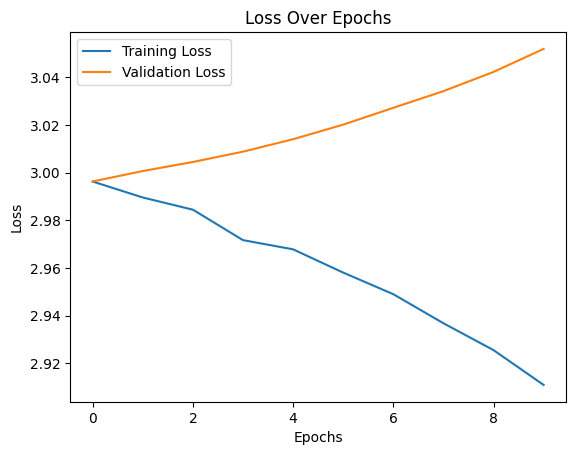

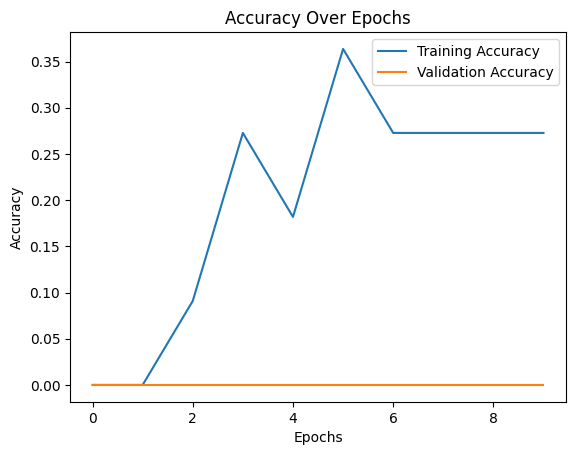

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Generated Text: this is an example from file file from file file replace file replace this


In [12]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Example text data (replace this with your actual dataset)
processed_text = """
This is an example text. It can represent your text data loaded from the file.
You can replace this text with your actual dataset.
"""

# Define sequence length
sequence_length = 10  # Adjust based on your dataset

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([processed_text])
sequences = tokenizer.texts_to_sequences([processed_text])[0]  # Flatten the list

# Prepare input-output pairs for RNN
X_data, y_data = [], []
for i in range(len(sequences) - sequence_length):
    X_data.append(sequences[i:i + sequence_length])  # Input sequence
    y_data.append(sequences[i + sequence_length])   # Output label (next word)

# Convert to numpy arrays
X = np.array(X_data)
y = np.array(y_data)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vocabulary size (add 1 for padding token if used)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Define the RNN model with ReLU activation
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(64),  # Hidden layer
    Activation('relu'),  # ReLU activation
    Dense(vocab_size, activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Generate new text using the trained model
def generate_text(seed_text, next_words, model, tokenizer, sequence_length):
    for _ in range(next_words):
        tokenized_input = tokenizer.texts_to_sequences([seed_text])[0]
        tokenized_input = pad_sequences([tokenized_input], maxlen=sequence_length, padding='pre')
        predicted_word_index = np.argmax(model.predict(tokenized_input), axis=-1)
        predicted_word = tokenizer.index_word.get(predicted_word_index[0], '')
        seed_text += " " + predicted_word
    return seed_text

# Example text generation
seed_text = "this is an example"
generated_text = generate_text(seed_text, next_words=10, model=model, tokenizer=tokenizer, sequence_length=sequence_length)
print(f"Generated Text: {generated_text}")


In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0909 - loss: 2.9928 - val_accuracy: 0.0000e+00 - val_loss: 3.0017
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2727 - loss: 2.9861 - val_accuracy: 0.0000e+00 - val_loss: 3.0070
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3636 - loss: 2.9760 - val_accuracy: 0.0000e+00 - val_loss: 3.0131
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4545 - loss: 2.9678 - val_accuracy: 0.0000e+00 - val_loss: 3.0203
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6364 - loss: 2.9584 - val_accuracy: 0.0000e+00 - val_loss: 3.0291
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4545 - loss: 2.9474 - val_accuracy: 0.0000e+00 - val_loss: 3.0395
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3636 - loss: 2.9399 - val_accuracy: 0.0000e+00 - val_loss: 3.0510
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4545 - loss: 2.9221 - val_accur

In [10]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 3.1039
Validation Loss: 3.1038997173309326
Validation Accuracy: 0.0


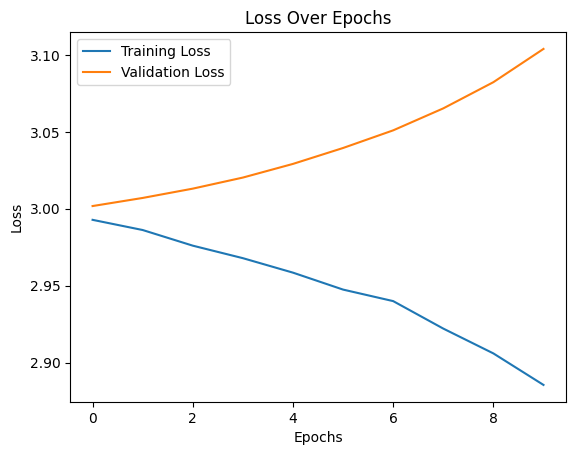

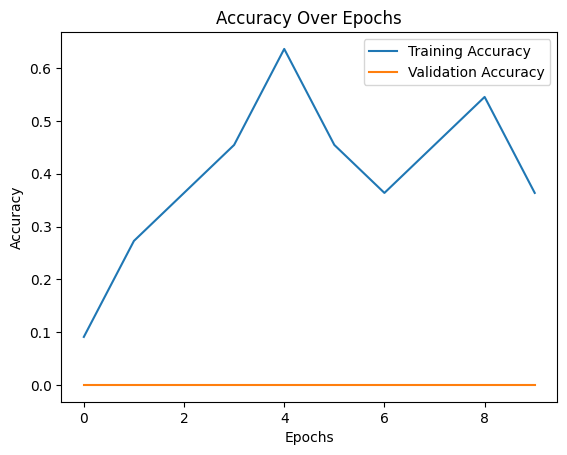

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


In [7]:
import numpy as np

def generate_text(seed_text, next_words, model, tokenizer, sequence_length):
    for _ in range(next_words):
        # Tokenize the input text
        tokenized_input = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the input
        tokenized_input = pad_sequences([tokenized_input], maxlen=sequence_length, padding='pre')
        # Predict the next word
        predicted_word_index = np.argmax(model.predict(tokenized_input), axis=-1)
        # Convert the index back to a word
        predicted_word = tokenizer.index_word.get(predicted_word_index[0], '')
        # Append the word to the seed text
        seed_text += " " + predicted_word
    return seed_text

# Generate text
seed_text = "this is an example"
generated_text = generate_text(seed_text, next_words=10, model=model, tokenizer=tokenizer, sequence_length=sequence_length)
print(f"Generated Text: {generated_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Generated Text: this is an example can this dataset dataset actual dataset dataset dataset the file
